In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from torch.utils.data import Dataset, DataLoader
import torch
from distutils.util import strtobool
import random

from scipy.stats import norm
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import pandas as pd
import importlib

# This is just until temporary implementation
import os 
import sys
cwd = os.getcwd()
sys.path.insert(0,cwd + '/../timetransformers')

import Transformer 
# from data_handling import TimeSeriesDataset, download_data
# from utils import convert_df_to_numpy, convert_tsf_to_dataframe

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
device = torch.device("cpu")

importlib.reload(Transformer)

output_dim = 3  # To begin with we can use a Gaussian with mean and variance
d_model = 8
num_heads = 1
num_layers = 1
d_ff = 8
dropout = 0.1
num_distribution_layers = 4

batch_size, max_seq_length = 100, 10

transformer = Transformer.Decoder_Transformer(
    output_dim,
    d_model,
    num_heads,
    num_layers,
    d_ff,
    max_seq_length,
    dropout,
    num_distribution_layers,
).to(device)

In [8]:
output = torch.ones(batch_size, max_seq_length, output_dim)
output[:, :, 0] = 0.0
output[:, :, 1] = -100
output[:, :, 2] = 1000.0
y_pred = torch.zeros(batch_size, max_seq_length)
test_loss_CRPS = transformer.crps_student_t_approx(
    output,
    y_pred,
    num_samples=100000,
    epsilon=torch.tensor(1e-30, dtype=torch.float32),
    mask=torch.ones((batch_size, max_seq_length), dtype=torch.bool),
)
print(test_loss_CRPS)

torch.Size([1000]) torch.Size([1000]) torch.Size([1000]) torch.Size([1000])
tensor(2.3382e-31)


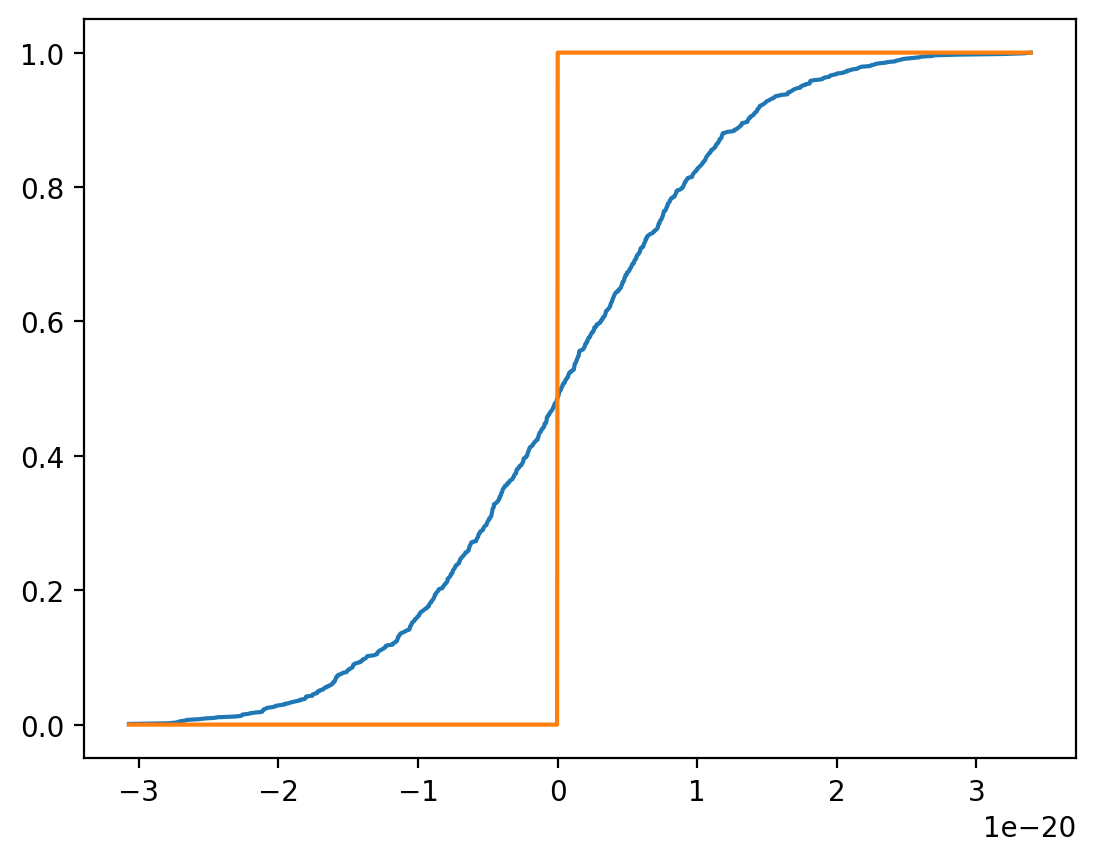

torch.Size([1000, 2, 10])
torch.Size([2, 10])
tensor(2.3638e-21)


In [6]:
output = torch.ones(batch_size, max_seq_length, output_dim)
output[:, :, 0] = 0.0
output[:, :, 1] = -1000.0
output[:, :, 2] = 100.0
y_pred = torch.zeros(batch_size, max_seq_length)
test_loss_CRPS = transformer.crps_student_t_approx(
    output, y_pred, num_samples=1000, epsilon=torch.tensor(1e-20, dtype=torch.float32)
)
print(test_loss_CRPS)

In [291]:
from torch.distributions.studentT import StudentT
import torch.nn.functional as F

mean = output[:, :, 0]  # Assuming this is your desired mean
scale = torch.full_like(mean, 0.001)  # Very small scale for narrow distribution
dof = torch.full_like(mean, 1000)  # High dof to approximate normal distribution
print(scale.shape)

student_t_dist = StudentT(dof, mean, scale)
samples = student_t_dist.rsample((10,))
# print(samples)

torch.Size([2, 10])
